<a href="https://colab.research.google.com/github/y-arjun-y/manchester-fs/blob/main/Manchester_FS_Software_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manchester FS Software Challenge
Name: Arjun Yadav  
Student ID: 11534431

## Loading the Data and Preliminary Calculations

In [ ]:
data = '/content/Telemetry_Data_Simple_Software_Challenge.csv' # to run this notebook, just drop the .csv file into the files tab on Google Colab
df = pd.read_csv(data)

radius_front = 0.64262 / 2
radius_rear = 0.66802 / 2

# Linear speeds for each wheel
df['speed_front_left'] = radius_front * df['wheel_rotation_speed_front_left (rad/s)']
df['speed_front_right'] = radius_front * df['wheel_rotation_speed_front_right (rad/s)']
df['speed_rear_left'] = radius_rear * df['wheel_rotation_speed_rear_left (rad/s)']
df['speed_rear_right'] = radius_rear * df['wheel_rotation_speed_rear_right (rad/s)']

# Average speed
df['average_speed'] = df[['speed_front_left', 'speed_front_right', 'speed_rear_left', 'speed_rear_right']].mean(axis=1)

### Task 1

Total Distance Covered: 6003.99 meters


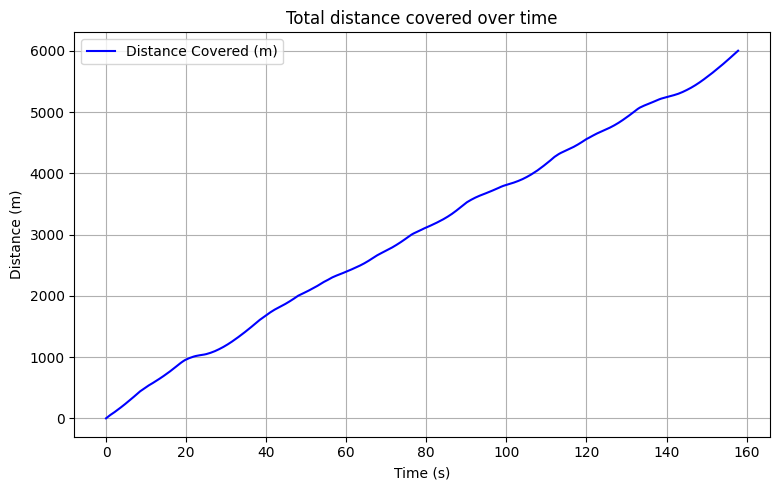

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['dt'] = df['timestamp (s)'].diff().fillna(0) # calculating time diff between timestamps
df['distance'] = df['average_speed'] * df['dt']
total_distance = df['distance'].sum()
print(f"Total Distance Covered: {total_distance:.2f} meters")

# Visualisation with matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(df['timestamp (s)'], df['distance'].cumsum(), label='Distance Covered (m)', color='blue')
plt.title('Total distance covered over time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

## Task 2

Total Power Loss: 40746890.73 W
Average Power Loss (significant losses): 225120.94 W


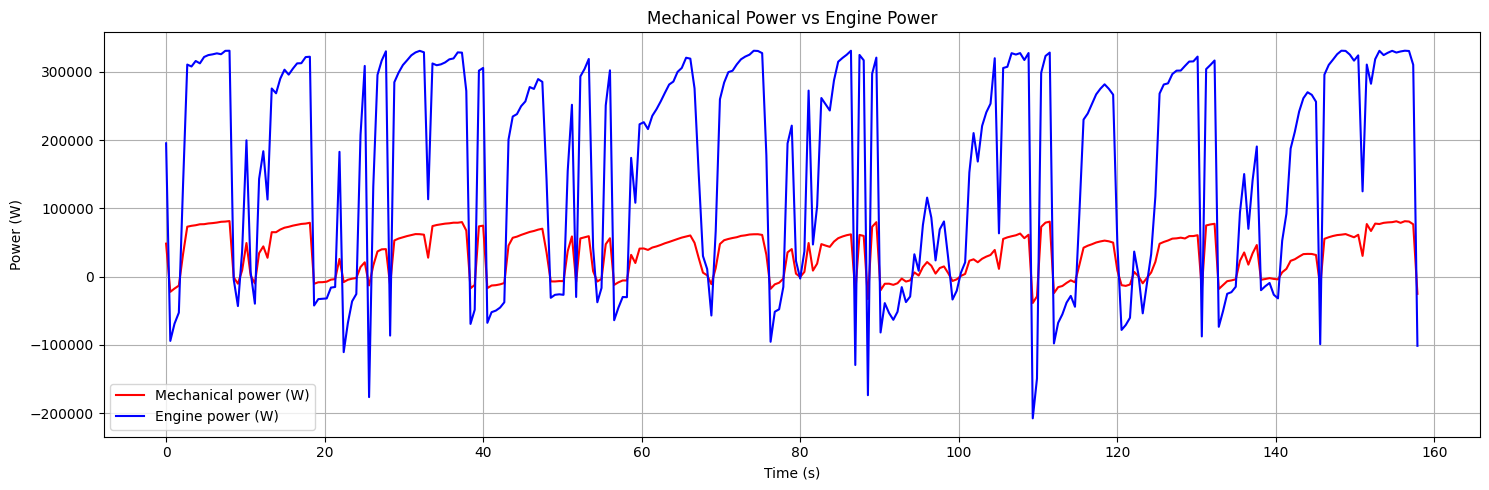

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['mechanical_power_front_left'] = df['torque (Nm)'] * df['wheel_rotation_speed_front_left (rad/s)']
df['mechanical_power_front_right'] = df['torque (Nm)'] * df['wheel_rotation_speed_front_right (rad/s)']
df['mechanical_power_rear_left'] = df['torque (Nm)'] * df['wheel_rotation_speed_rear_left (rad/s)']
df['mechanical_power_rear_right'] = df['torque (Nm)'] * df['wheel_rotation_speed_rear_right (rad/s)']

df['mechanical_power'] = df[['mechanical_power_front_left', 'mechanical_power_front_right',
                               'mechanical_power_rear_left', 'mechanical_power_rear_right']].mean(axis=1)
df['engine_power'] = df['power (W)']
df['power_loss'] = df['engine_power'] - df['mechanical_power']

significant_losses = df[df['power_loss'] > 1e5]

total_power_loss = significant_losses['power_loss'].sum()
average_power_loss = significant_losses['power_loss'].mean()

print(f"Total Power Loss: {total_power_loss:.2f} W")
print(f"Average Power Loss (significant losses): {average_power_loss:.2f} W")

# Visualisation with matplotlib
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp (s)'], df['mechanical_power'], label='Mechanical power (W)', color='red')
plt.plot(df['timestamp (s)'], df['engine_power'], label='Engine power (W)', color='blue')
plt.title('Mechanical Power vs Engine Power')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

# Task 3

<ipython-input-76-dc7c2711ad5b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acceleration'].fillna(0, inplace=True)


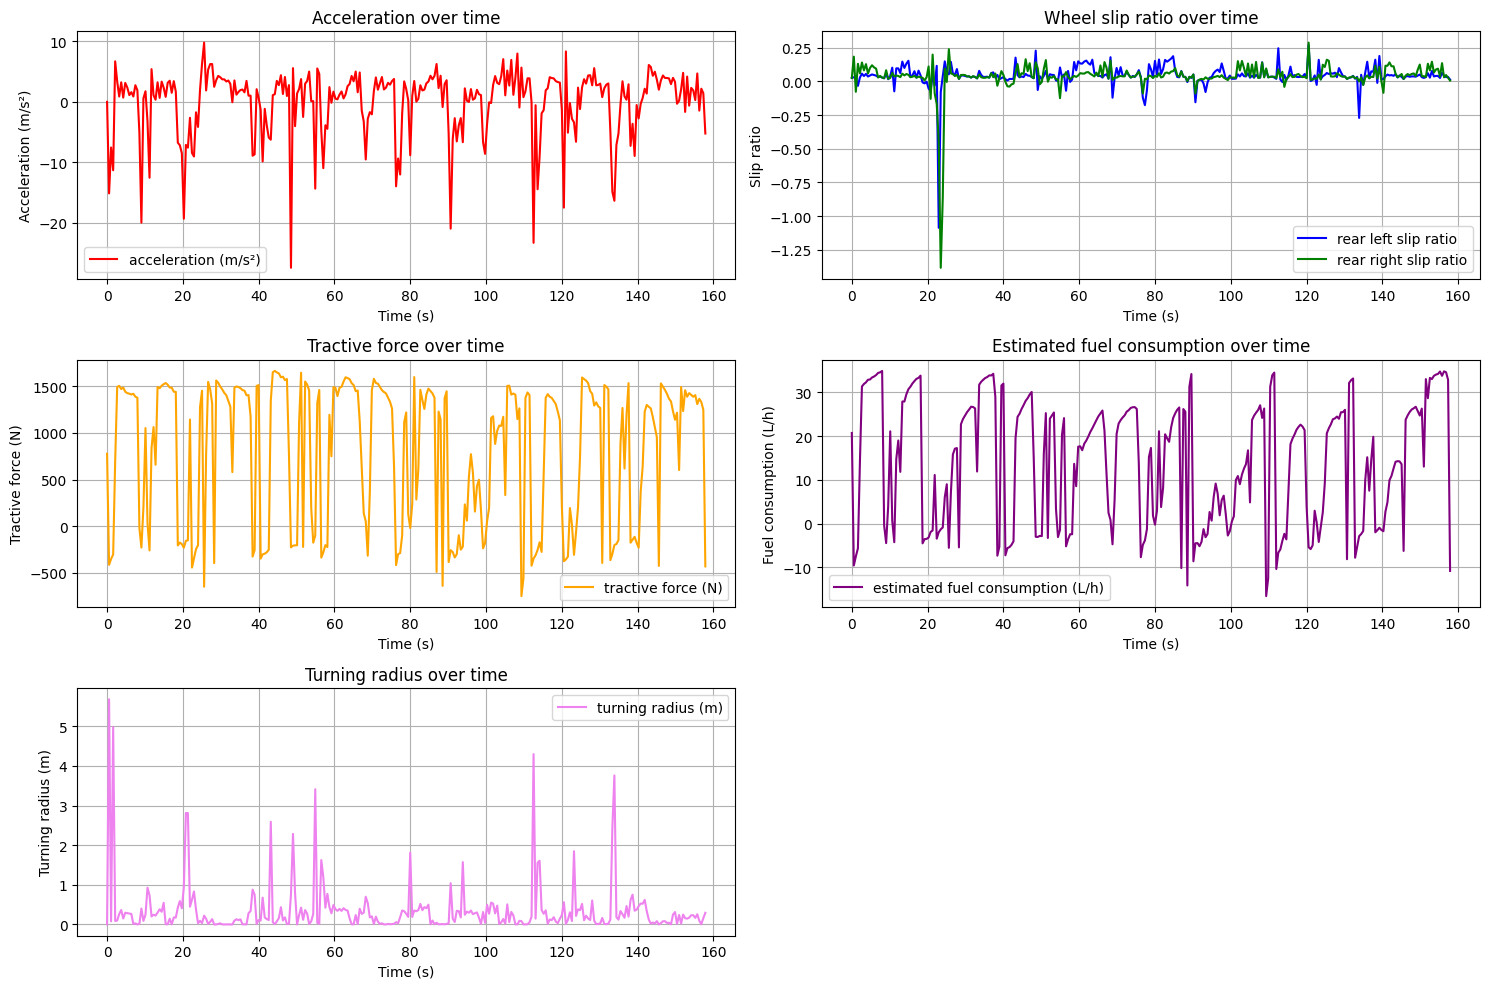

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate acceleration and deceleration
df['acceleration'] = df['average_speed'].diff() / df['timestamp (s)'].diff()
df['acceleration'].fillna(0, inplace=True)

# Calculate wheel slip ratio
df['slip_ratio_rear_left'] = (df['speed_rear_left'] - df['speed_front_left']) / df['speed_rear_left']
df['slip_ratio_rear_right'] = (df['speed_rear_right'] - df['speed_front_right']) / df['speed_rear_right']

# Calculate tractive force
df['tractive_force'] = df['torque (Nm)'] / radius_rear

# Estimate fuel efficiency: assuming engine efficiency of 25% and energy density of gasoline ~33.6 MJ/L
energy_density = 33.6
efficiency = 0.25

df['power_output'] = df['mechanical_power']
df['fuel_consumption_L'] = (df['power_output'] * 3600) / (energy_density * efficiency * 1e6)

# Analyze handling dynamics
df['turning_radius'] = np.abs(df['speed_front_left'] - df['speed_front_right']) / 2
df['lateral_force'] = df['torque (Nm)'] / df['turning_radius']

# Visualisations with matplotlib
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(df['timestamp (s)'], df['acceleration'], label='acceleration (m/s²)', color='red')
plt.title('Acceleration over time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['timestamp (s)'], df['slip_ratio_rear_left'], label='rear left slip ratio', color='blue')
plt.plot(df['timestamp (s)'], df['slip_ratio_rear_right'], label='rear right slip ratio', color='green')
plt.title('Wheel slip ratio over time')
plt.xlabel('Time (s)')
plt.ylabel('Slip ratio')
plt.grid()
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['timestamp (s)'], df['tractive_force'], label='tractive force (N)', color='orange')
plt.title('Tractive force over time')
plt.xlabel('Time (s)')
plt.ylabel('Tractive force (N)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['timestamp (s)'], df['fuel_consumption_L'], label='estimated fuel consumption (L/h)', color='purple')
plt.title('Estimated fuel consumption over time')
plt.xlabel('Time (s)')
plt.ylabel('Fuel consumption (L/h)')
plt.grid()
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['timestamp (s)'], df['turning_radius'], label='turning radius (m)', color='violet')
plt.title('Turning radius over time')
plt.xlabel('Time (s)')
plt.ylabel('Turning radius (m)')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()